# Module 2.2 Basic Visualization of Data with `plotnine`

In this module, we will learn how to use the `plotnine` package to create basic visualizations of data.

`plotnine` is a Python implementation of the 'Grammar of Graphics' that was originally developed in the R package `ggplot2`, which is a powerful and flexible visualization package. The grammar of graphics, is a theory of visualization that describes how to **build** a visualization from components. The grammar of graphics is described in detail in the book [The Grammar of Graphics](https://www.springer.com/gp/book/9780387245447) by Leland Wilkinson.

## The Grammar of Graphics

The grammar of graphics describes a visualization as a mapping between data and aesthetic attributes (e.g. color, shape, size, etc.) of geometric objects (e.g. points, lines, bars, etc.). The grammar of graphics is composed of the following components:

- **Data**: The data to be visualized (usually a `pandas` `DataFrame`)
- **Aesthetics**: The aesthetic attributes of the geometric objects. (e.g. color, shape, size, etc.)
- **Geometric Objects**: The geometric objects that represent the data (e.g. points, lines, bars, etc.).
- **Scales**: The scales that map values in the data space to values in the aesthetic space.
- **Coordinate System**: The coordinate system that defines the space in which the geometric objects are drawn.
- **Statistical Transformations**: The statistical transformations that are applied to the data before plotting.
- **Facets**: The facets that are used to split the data into subsets and plot each subset on a separate panel.

Using these components, figures are built up in layers. For example, a scatter plot is composed of a layer of points, a layer of scales, and a layer of coordinate system. The grammar of graphics provides a *framework* for building up figures in layers.

In [2]:
import numpy as np 
import pandas as pd 
import plotnine as pn 

In [4]:
# Import the data as a pandas dataframe
data = pd.read_csv('data/GSE63482_Expression_matrix.tsv', sep='\t')

data

,gene_id,E15_cpn,E15_corticothal,E15_subcereb,E16_cpn,E16_corticothal,E16_subcereb,E18_cpn,E18_corticothal,E18_subcereb,P1_cpn,P1_corticothal,P1_subcereb
0,0610007C21Rik,3.628850e+01,29.698300,3.340490e+01,39.377400,3.443750e+01,30.097900,42.217700,3.985680e+01,32.034800,59.940700,58.409400,54.186200
1,0610007L01Rik,1.206950e+01,10.966100,1.092010e+01,10.353700,1.100810e+01,12.301300,10.785700,1.141970e+01,11.606800,16.325000,17.054100,14.946100
2,0610007P08Rik,6.412380e+00,7.046340,7.641080e+00,6.971550,7.232610e+00,6.708510,6.204450,6.601510e+00,4.911680,3.993170,3.806410,3.238020
3,0610007P14Rik,2.089430e+01,13.672500,1.484450e+01,23.519400,1.624610e+01,28.872900,29.619700,2.117910e+01,36.838800,29.359400,22.103000,32.700000
4,0610007P22Rik,2.080070e+01,19.686500,2.199760e+01,18.090600,1.825500e+01,19.137600,18.087300,1.806960e+01,17.483200,22.254400,23.984300,24.621500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25774,vesl-2,2.127080e-16,0.027159,1.526700e-25,0.025714,1.418250e-13,0.013786,0.024311,1.682800e-18,0.033038,0.020868,0.140264,0.060259
25775,wdp103,4.076470e-01,0.275522,3.704000e-01,0.640581,5.337540e-01,0.486473,0.441163,4.654600e-01,0.572070,0.564045,0.434918,0.402615
25776,wdr4,5.548660e+00,5.873140,6.091040e+00,5.836460,5.501650e+00,7.061410,6.971030,6.340210e+00,8.746420,11.419700,7.108320,10.236700
25777,wiz,6.625390e+00,6.581460,8.413580e+00,6.937630,6.275750e+00,7.135460,5.894330,4.287110e+00,6.076040,4.390600,3.832160,4.180550


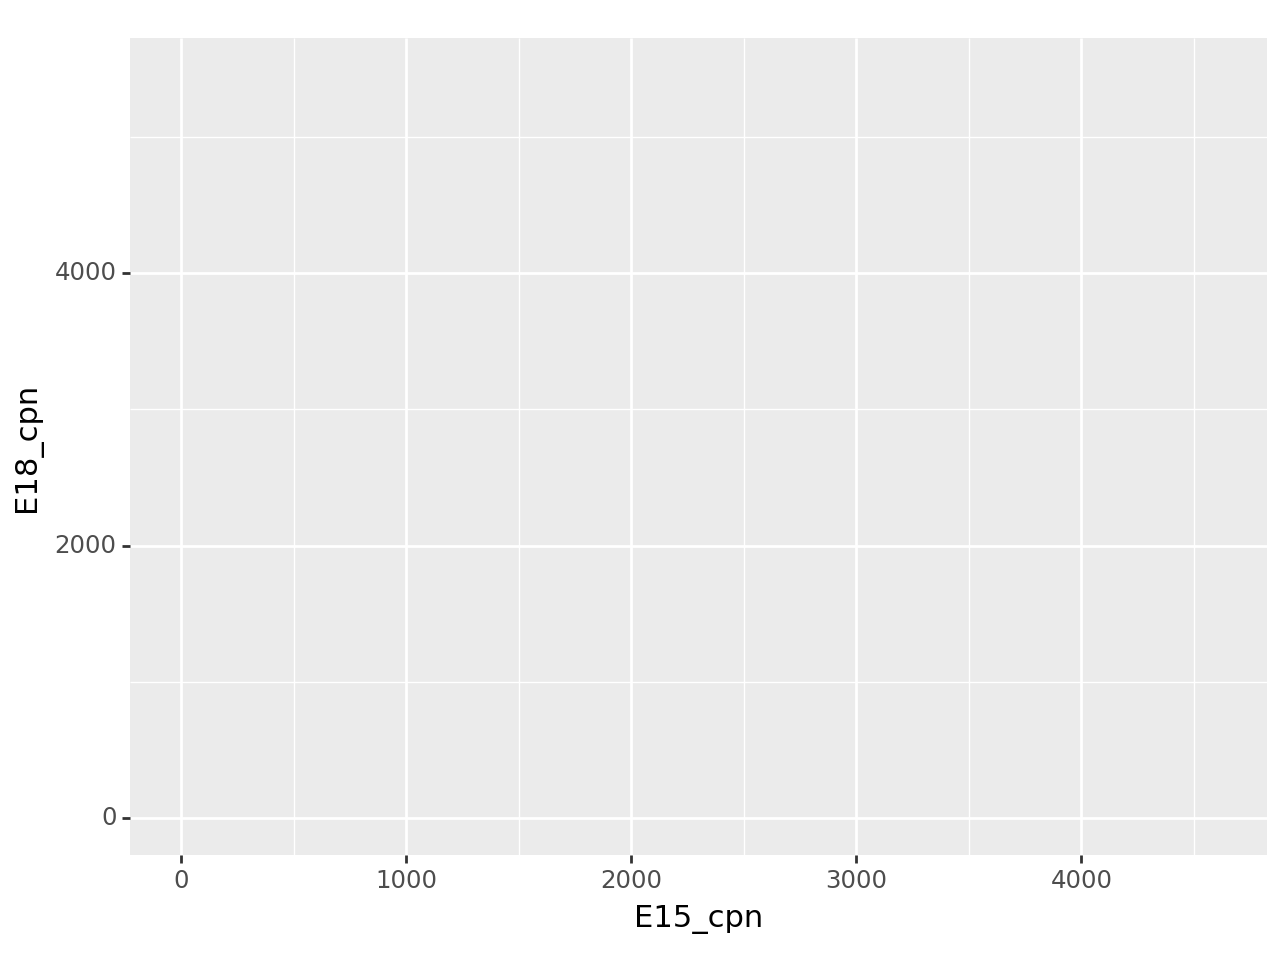

In [52]:
scatter = (
	pn.ggplot(data, pn.aes(x='E15_cpn', y='E18_cpn'))
)

scatter.draw()

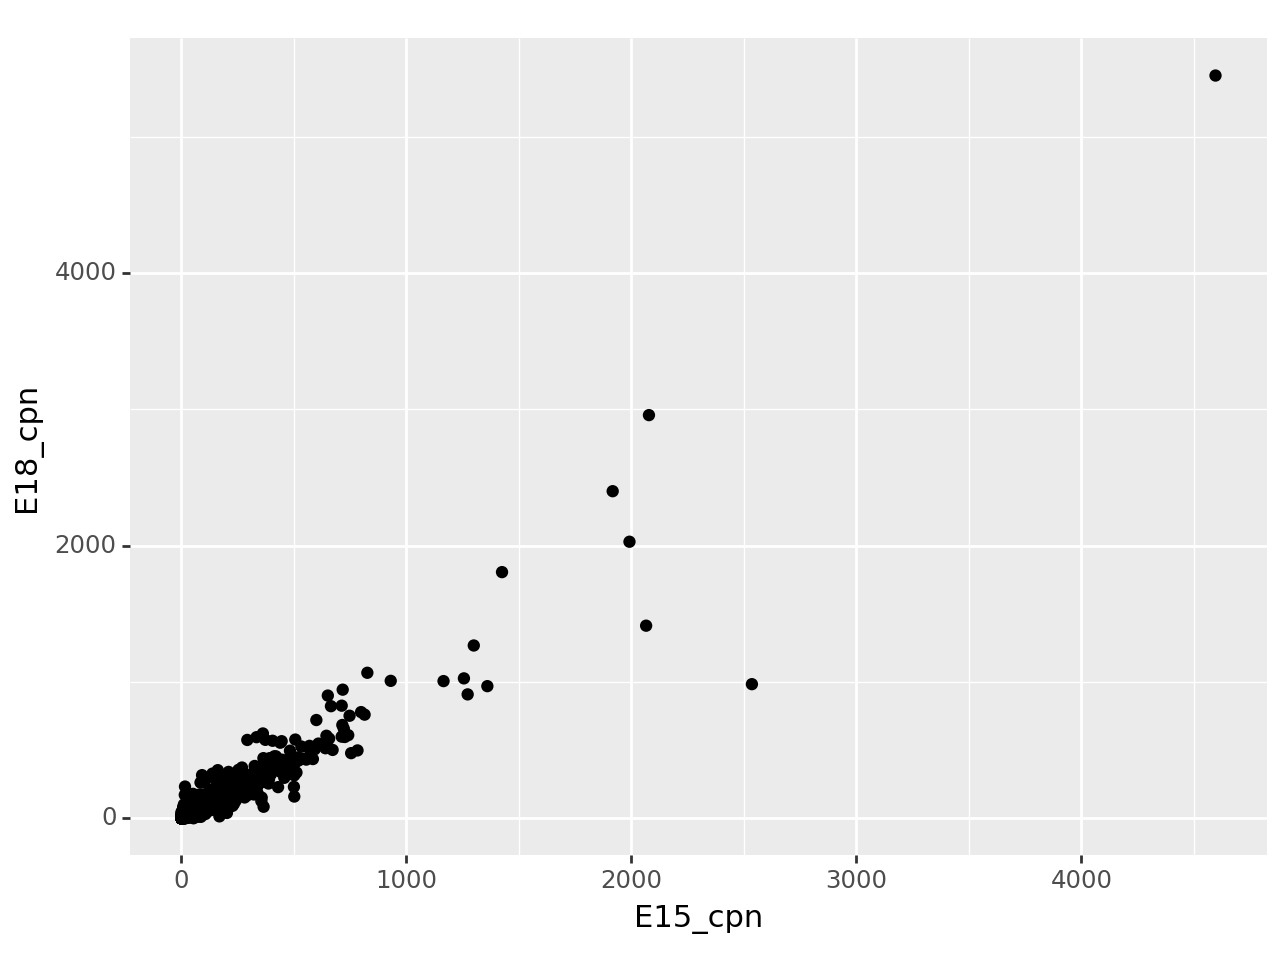

In [53]:
scatter = (
	pn.ggplot(data, pn.aes(x='E15_cpn', y='E18_cpn')) + 
	pn.geom_point()
)

scatter.draw()


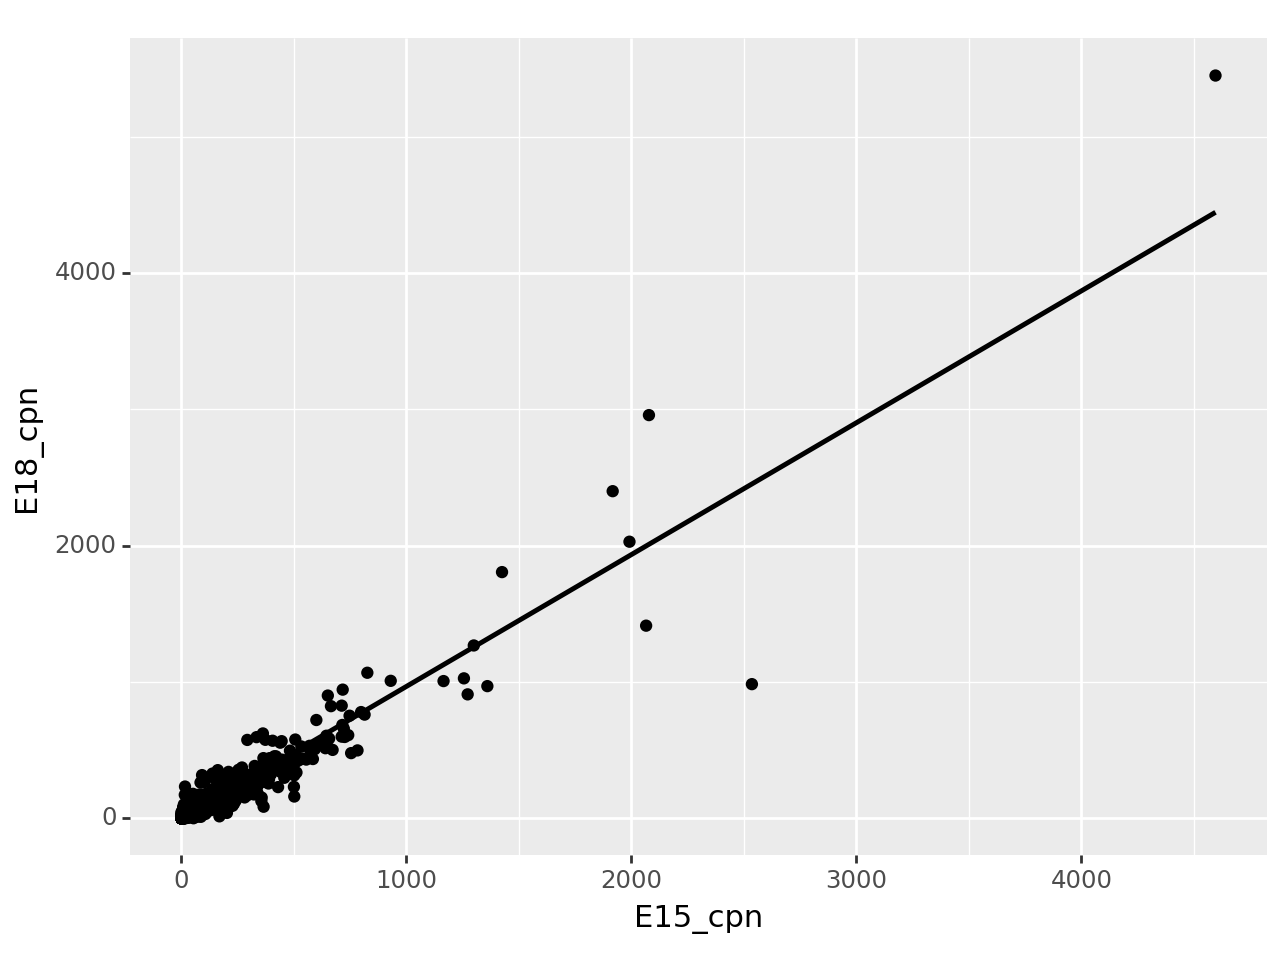

In [54]:
scatter = scatter + pn.geom_smooth(method="lm")

scatter.draw()

In [5]:
# Melt the 'wide' dataframe into a 'long' dataframe
data_melted = data.melt(id_vars=['gene_id'])

data_melted

,gene_id,variable,value
0,0610007C21Rik,E15_cpn,36.288500
1,0610007L01Rik,E15_cpn,12.069500
2,0610007P08Rik,E15_cpn,6.412380
3,0610007P14Rik,E15_cpn,20.894300
4,0610007P22Rik,E15_cpn,20.800700
...,...,...,...
309343,vesl-2,P1_subcereb,0.060259
309344,wdp103,P1_subcereb,0.402615
309345,wdr4,P1_subcereb,10.236700
309346,wiz,P1_subcereb,4.180550


In [16]:
# Split the 'variable' column into two columns ['age','celltype']
data_melted[['age','celltype']] = data_melted['variable'].str.split('_',expand=True)

data_melted

,gene_id,variable,value,age,celltype
0,0610007C21Rik,E15_cpn,36.288500,E15,cpn
1,0610007L01Rik,E15_cpn,12.069500,E15,cpn
2,0610007P08Rik,E15_cpn,6.412380,E15,cpn
3,0610007P14Rik,E15_cpn,20.894300,E15,cpn
4,0610007P22Rik,E15_cpn,20.800700,E15,cpn
...,...,...,...,...,...
309343,vesl-2,P1_subcereb,0.060259,P1,subcereb
309344,wdp103,P1_subcereb,0.402615,P1,subcereb
309345,wdr4,P1_subcereb,10.236700,P1,subcereb
309346,wiz,P1_subcereb,4.180550,P1,subcereb


/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/stats/stat_boxplot.py:100: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/stats/stat_boxplot.py:100: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/loyalgoff/opt/anaconda3/en

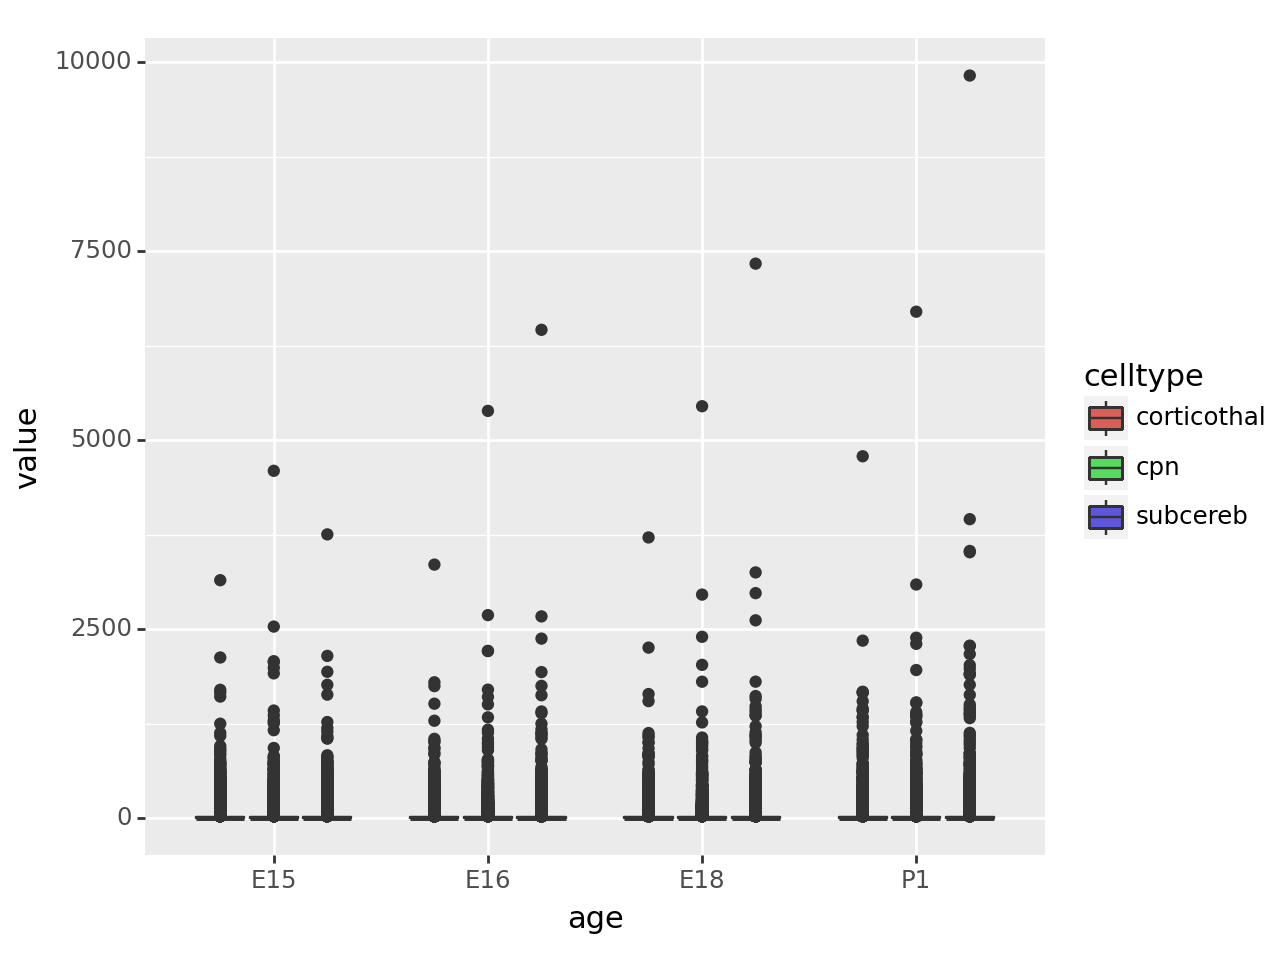

In [56]:
box_plot = (
	pn.ggplot(data_melted, pn.aes(x='age', y='value',fill='celltype'))
	+ pn.geom_boxplot()
)
box_plot.draw()

/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/stats/stat_boxplot.py:100: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/stats/stat_boxplot.py:100: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/loyalgoff/opt/anaconda3/en

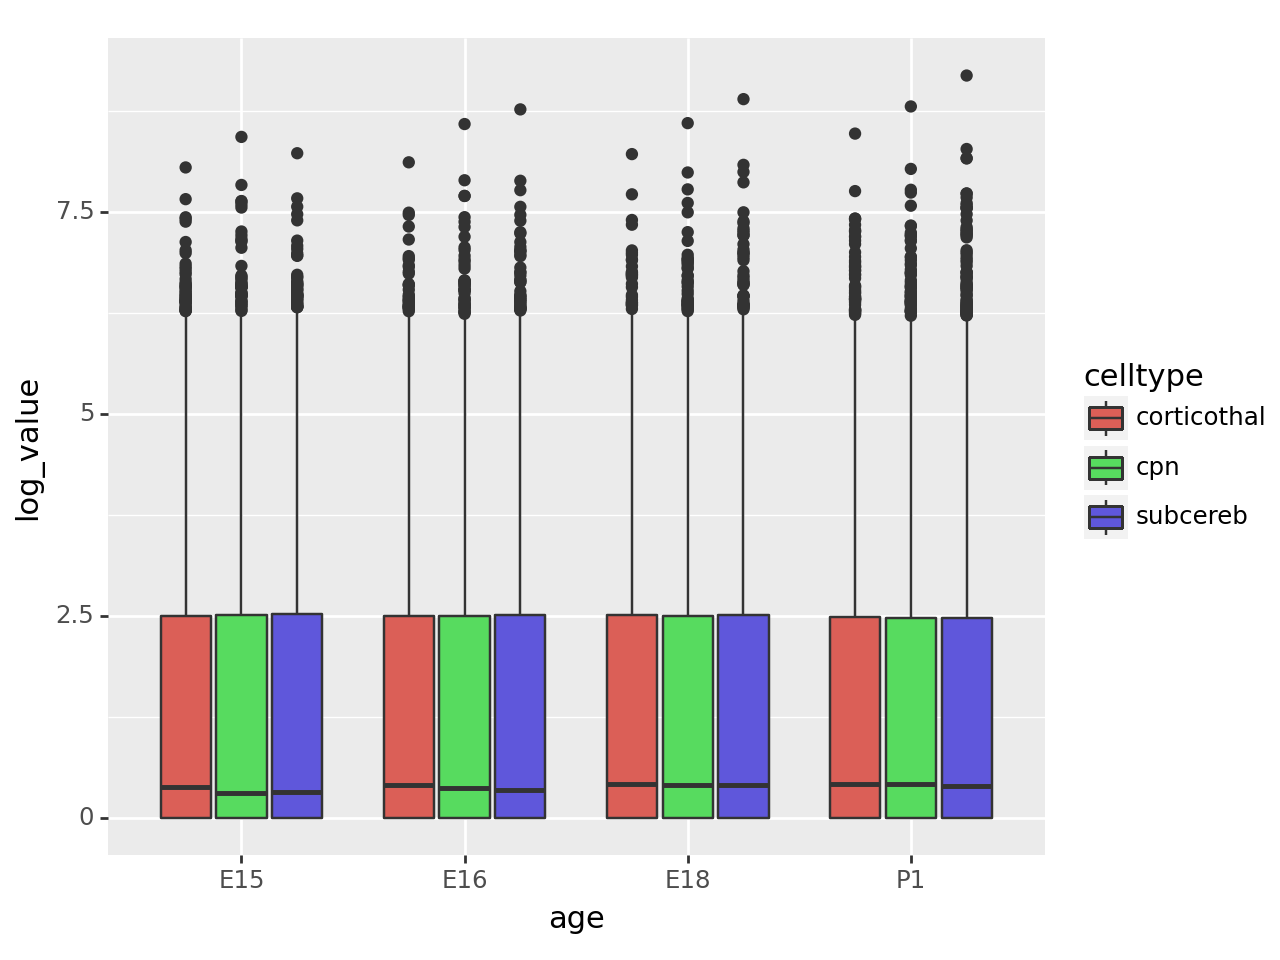

In [59]:
# Log transform the gene expression values
data_melted['log_value'] = np.log(data_melted['value']+1)

box_plot = (
	pn.ggplot(data_melted, pn.aes(x='age', y='log_value', fill='celltype'))
	+ pn.geom_boxplot()
)
box_plot.draw()


/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


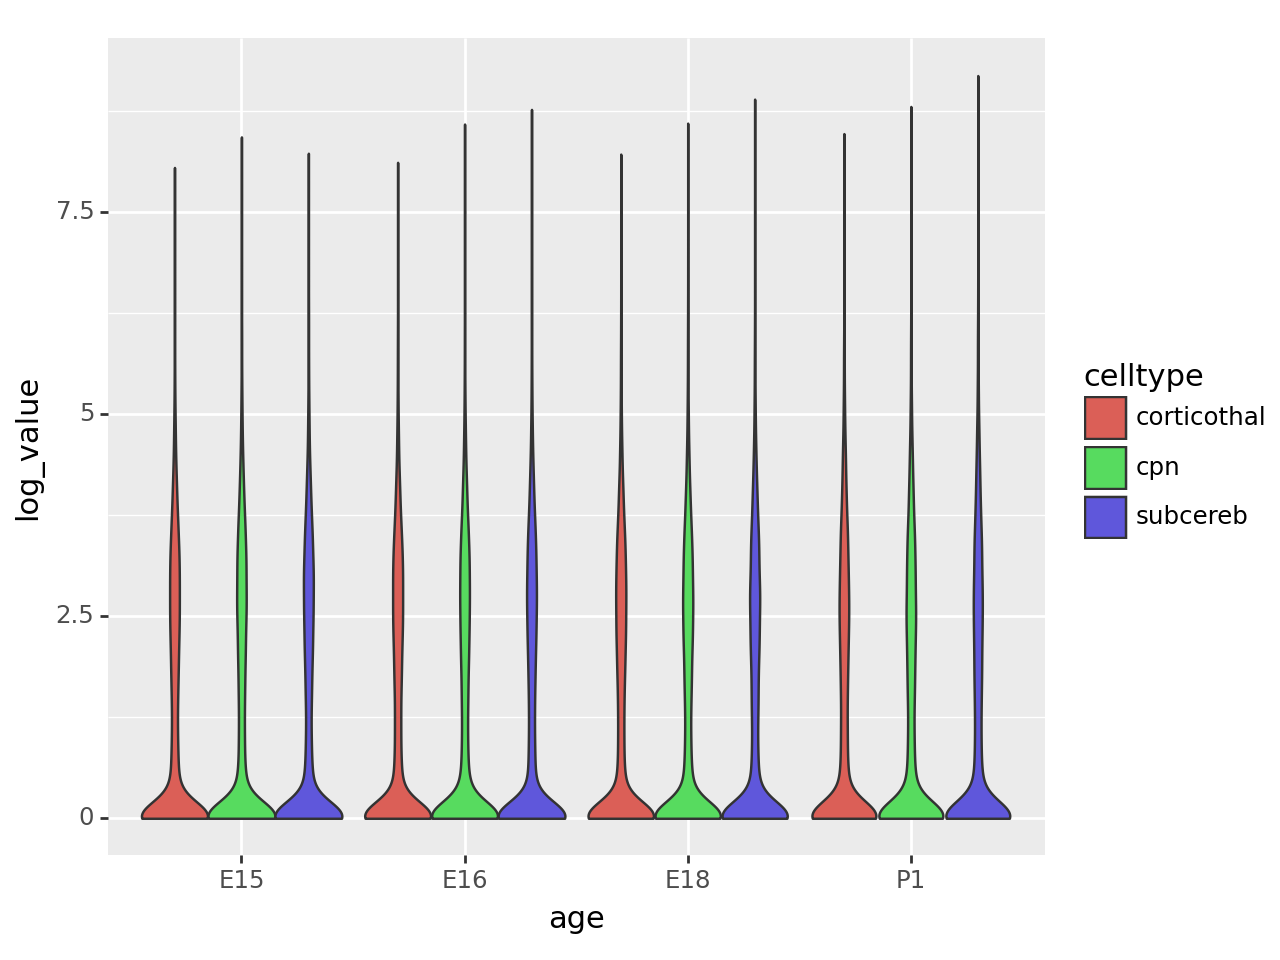

In [61]:
violin_plot = (
	pn.ggplot(data_melted, pn.aes(x='age', y='log_value', fill='celltype'))
	+ pn.geom_violin()
)
violin_plot.draw()


## Exploring a little deeper

## Faceting

/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/stats/stat_boxplot.py:100: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/stats/stat_boxplot.py:100: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/loyalgoff/opt/anaconda3/en

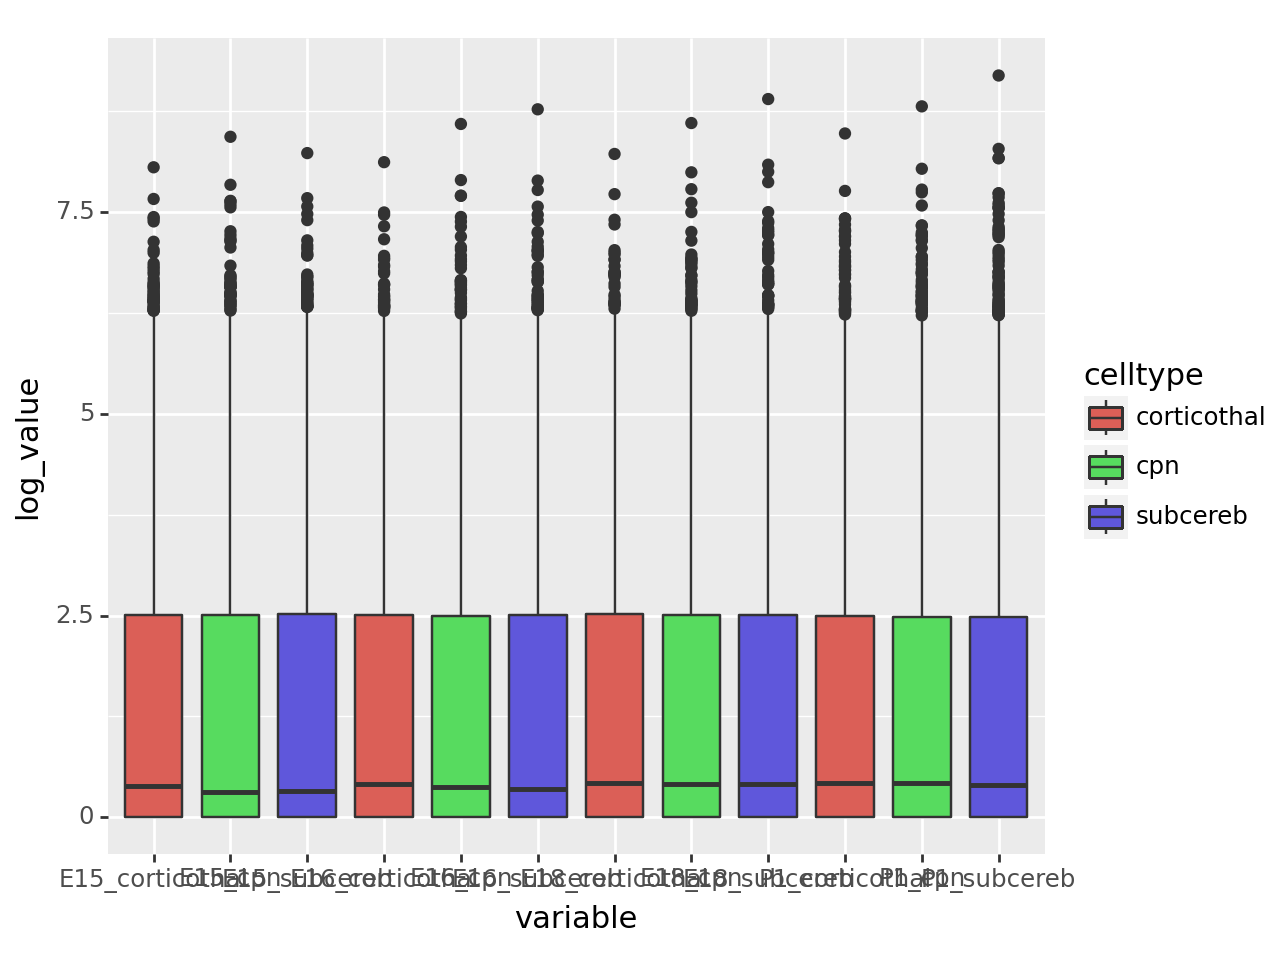

In [63]:
box_plot = (
	pn.ggplot(data_melted, pn.aes(x='variable', y='log_value', fill='celltype'))
	+ pn.geom_boxplot()
)
box_plot.draw()


/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:596: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the fut

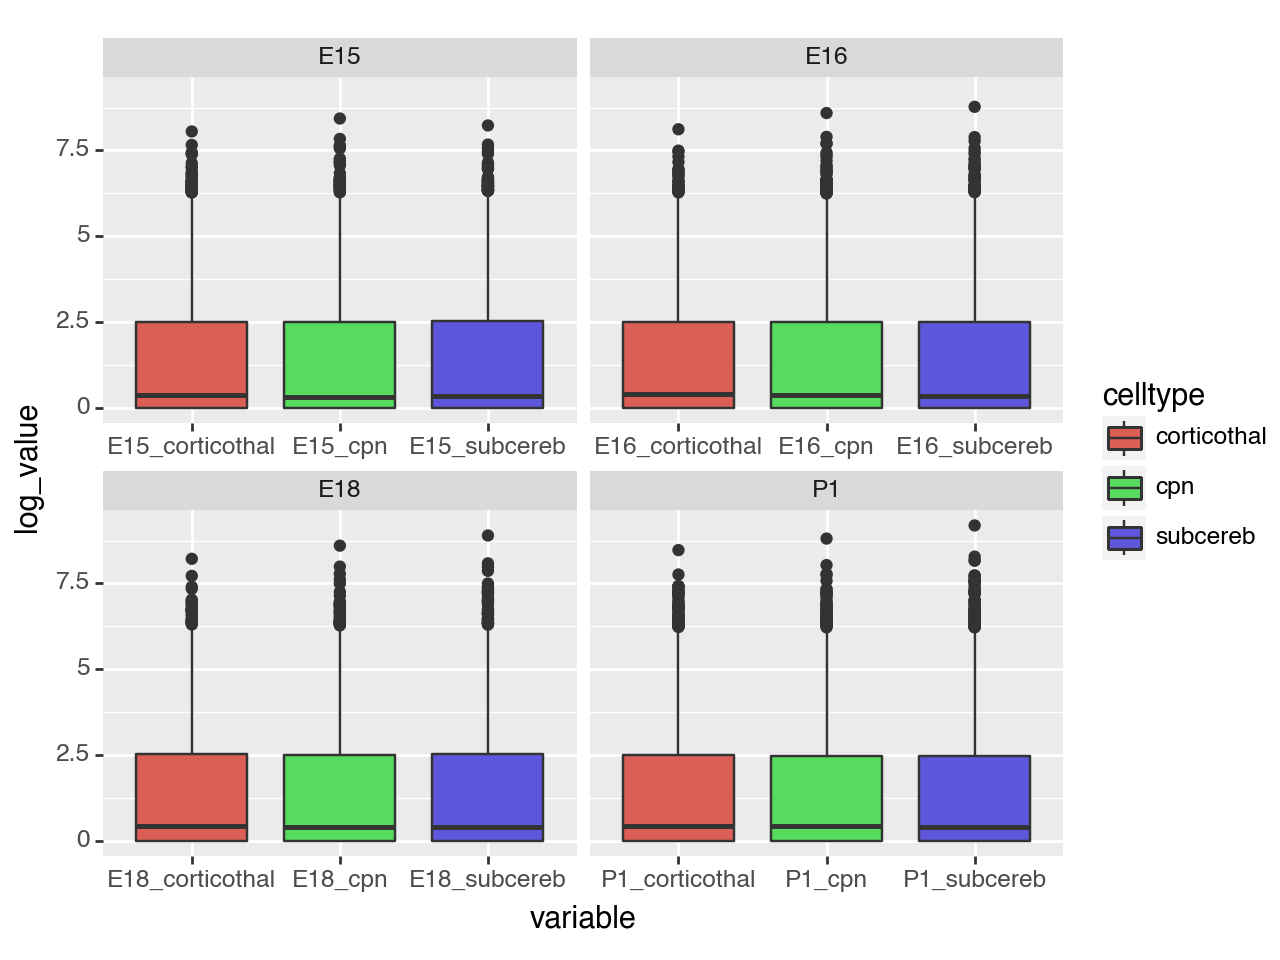

<Figure Size: (640 x 480)>

In [65]:
box_plot + pn.facet_wrap('age',scales='free_x')

/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:596: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the fut

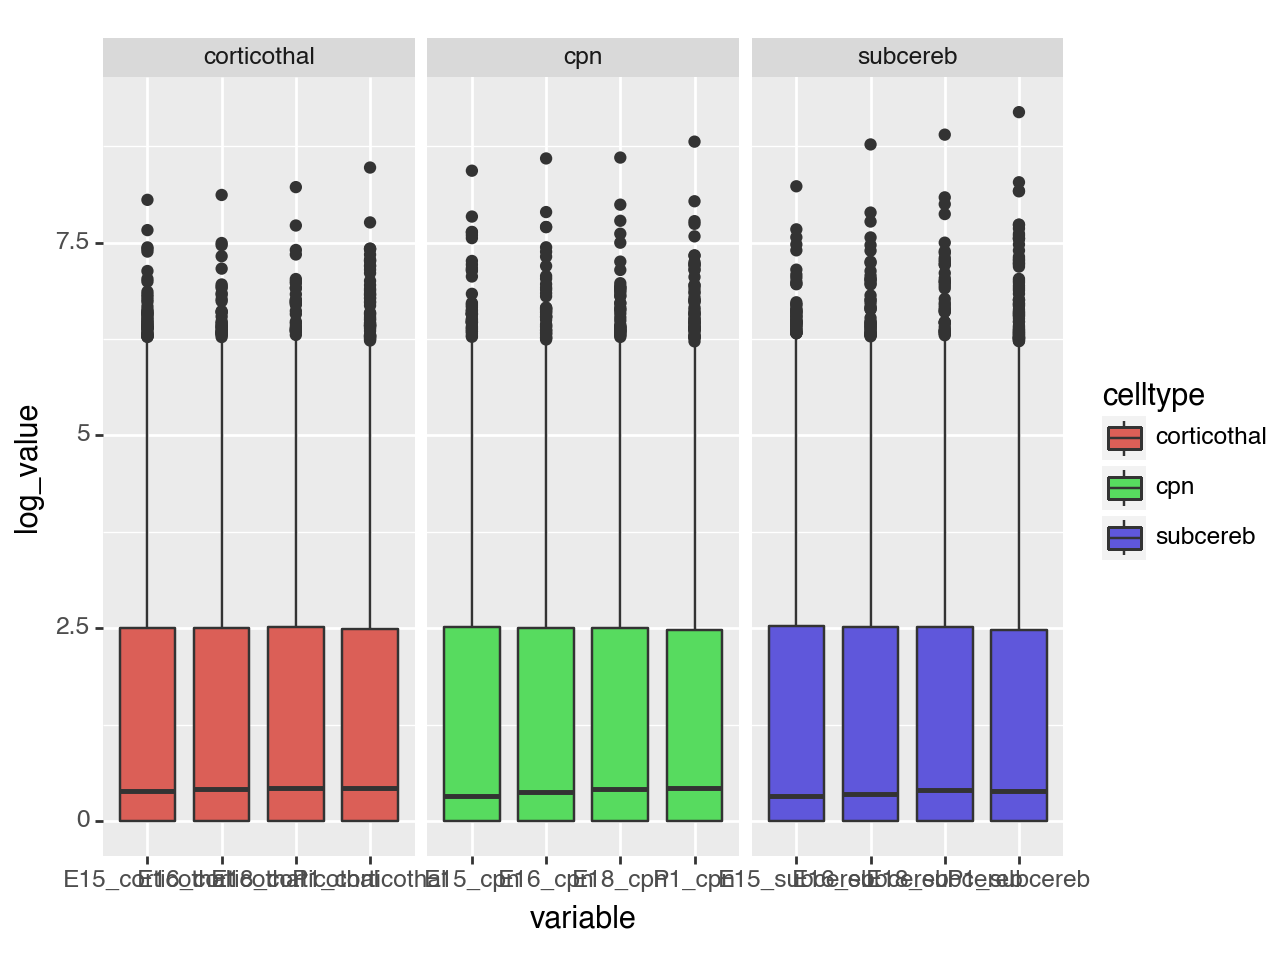

<Figure Size: (640 x 480)>

In [66]:
box_plot + pn.facet_wrap('celltype', scales='free_x')


/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/s

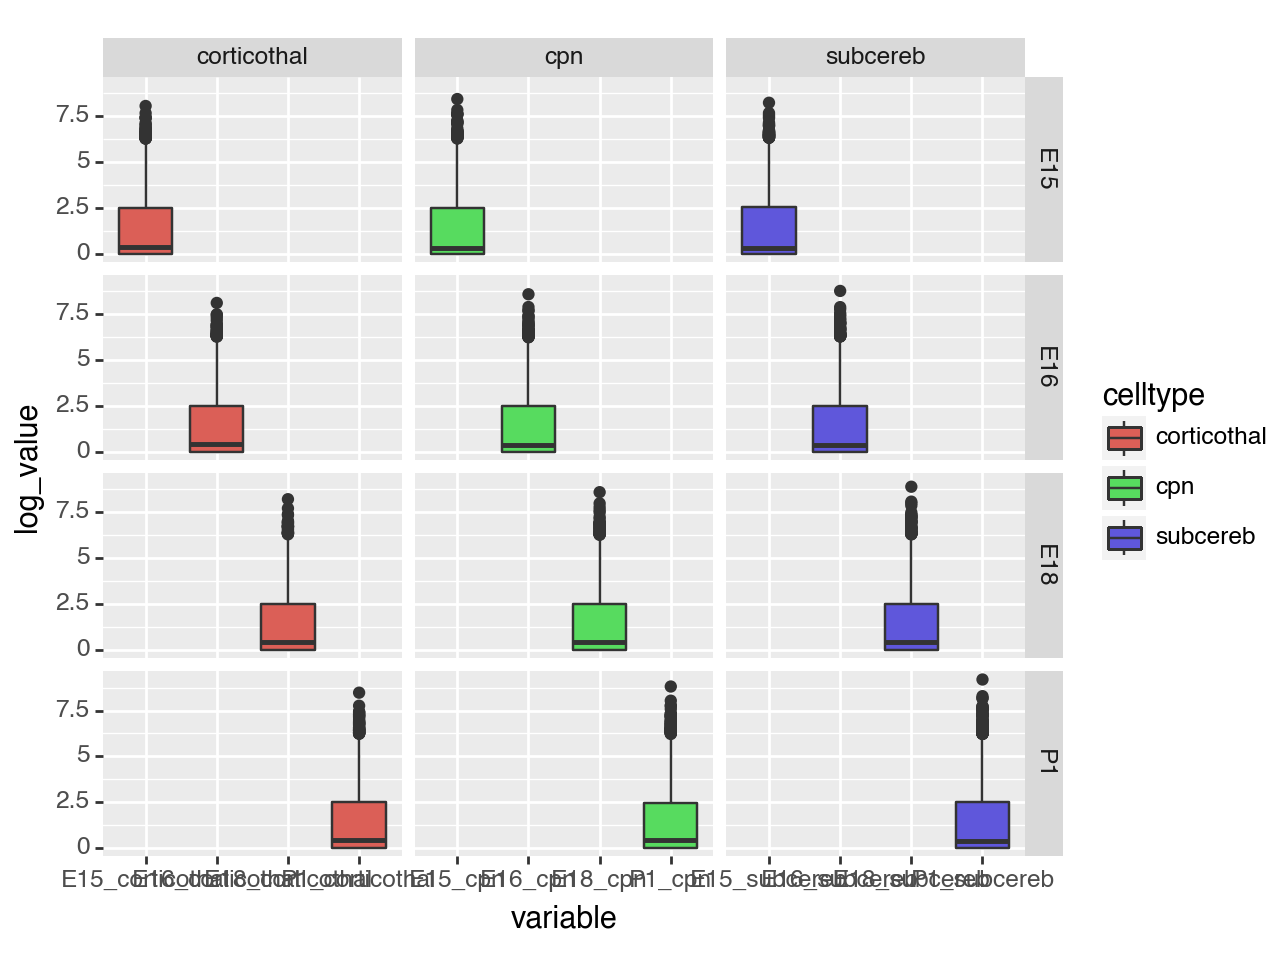

<Figure Size: (640 x 480)>

In [67]:
box_plot + pn.facet_grid('age ~ celltype', scales='free_x')


/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


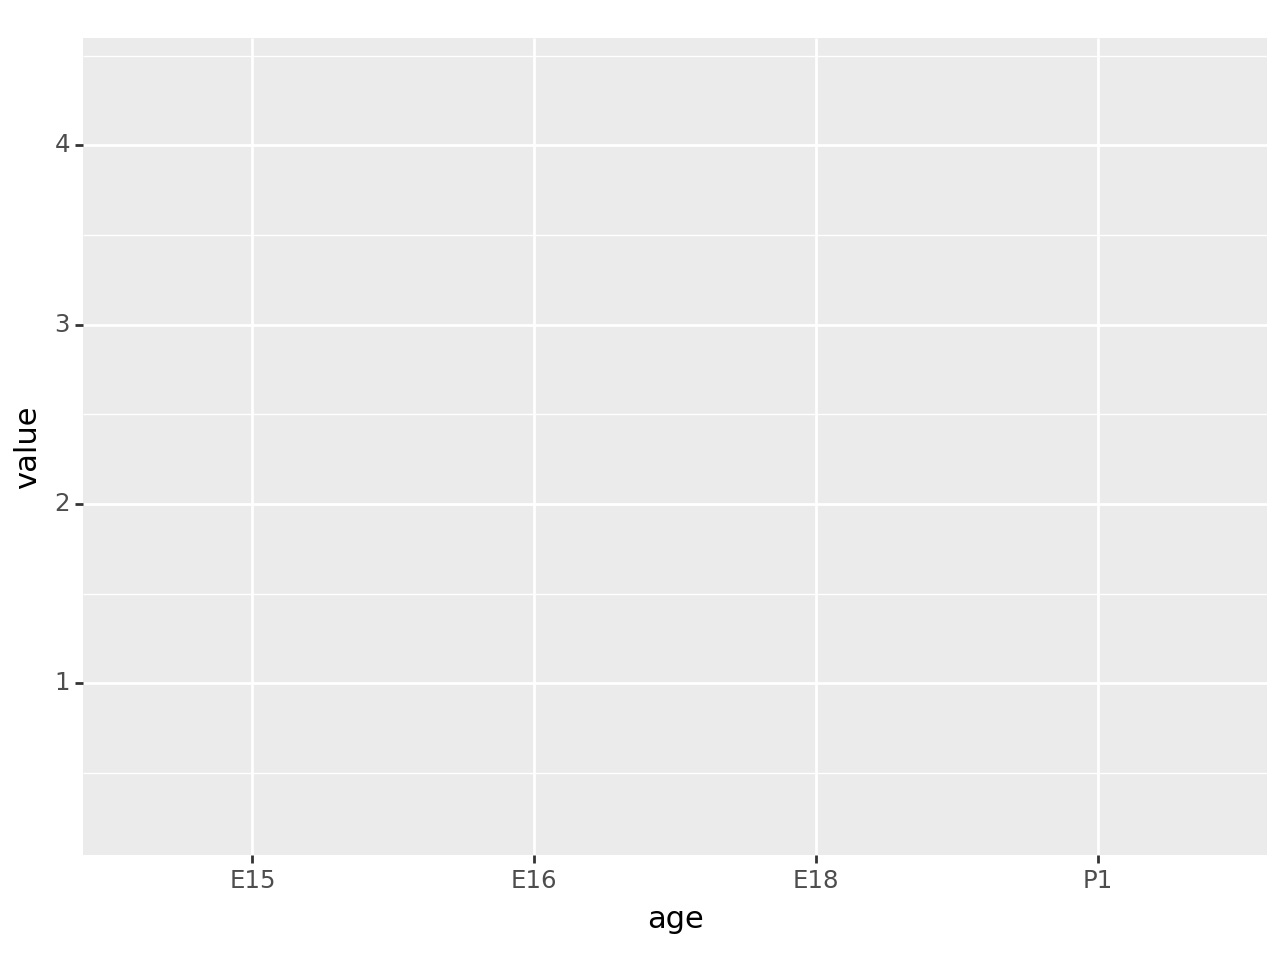

In [17]:
pax6_plot = (
	pn.ggplot(data_melted[data_melted['gene_id'] == 'Pax6'], pn.aes(x='age', y='value', color='celltype'))
)

pax6_plot.draw()

/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10

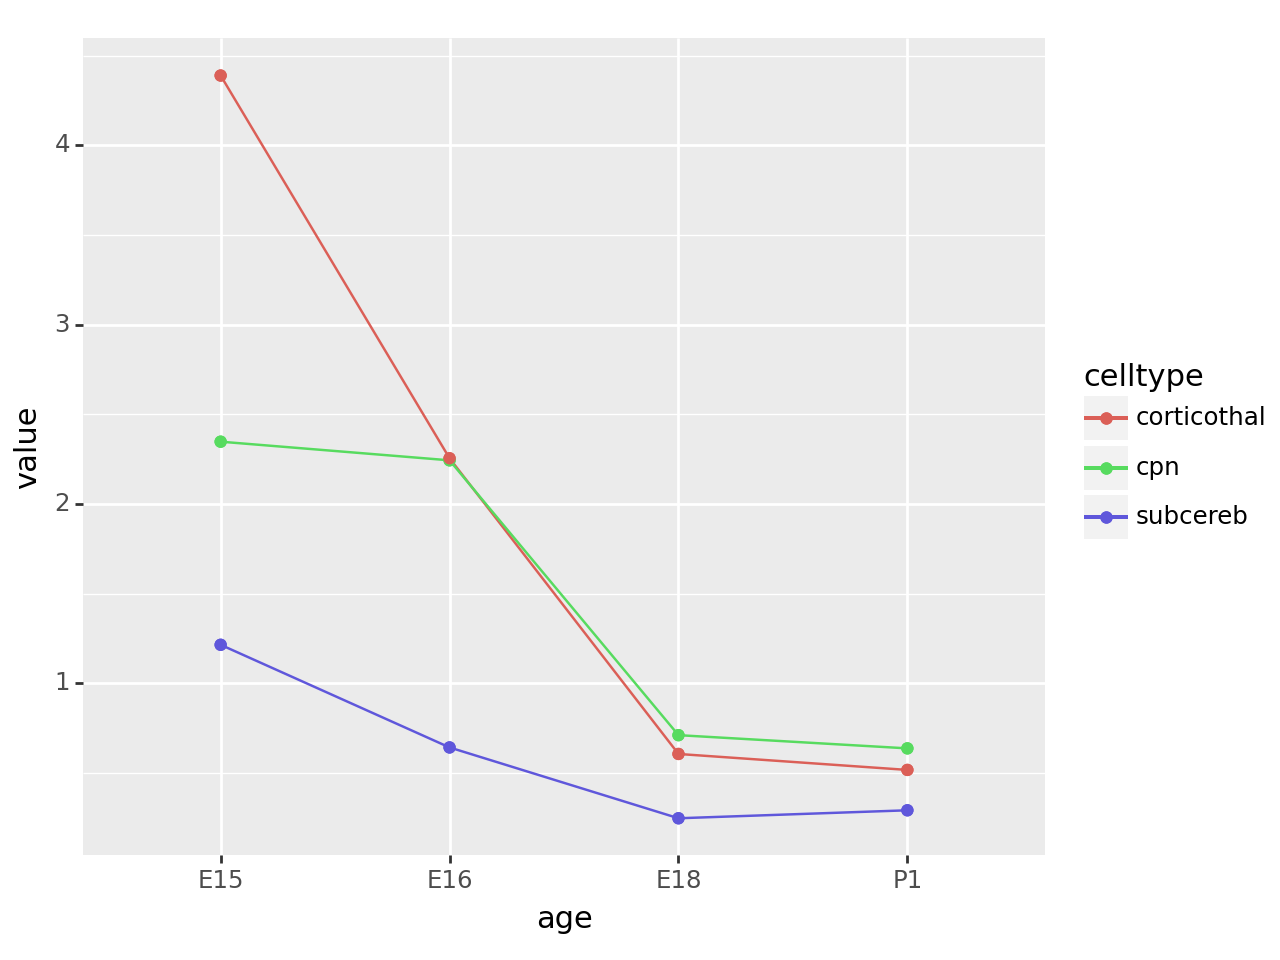

In [55]:
pax6_plot = pax6_plot + pn.geom_point()

pax6_plot.draw()

/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


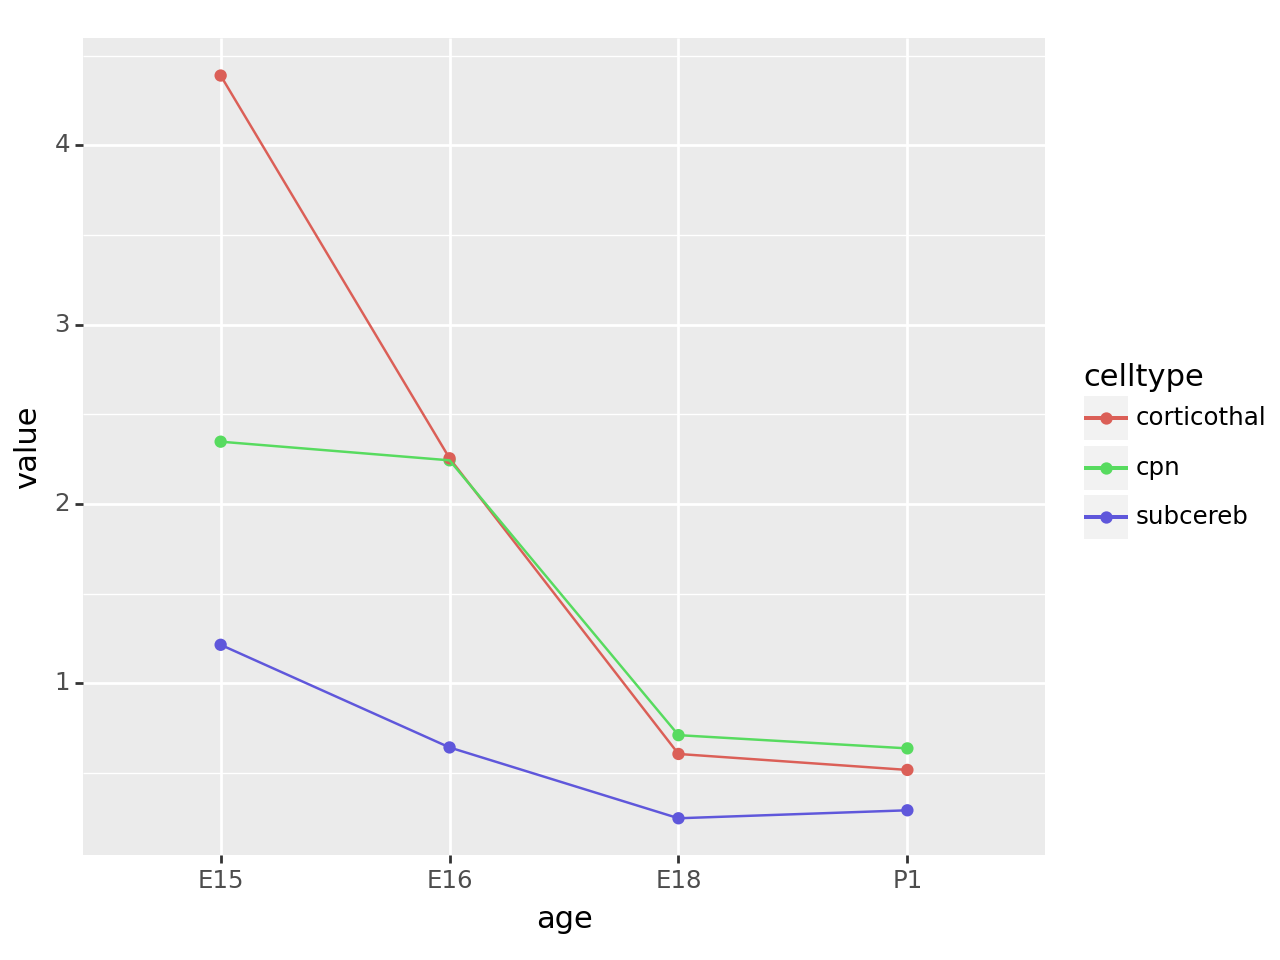

In [19]:
pax6_plot = pax6_plot + pn.geom_line(pn.aes(group='celltype'))

pax6_plot.draw()


/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


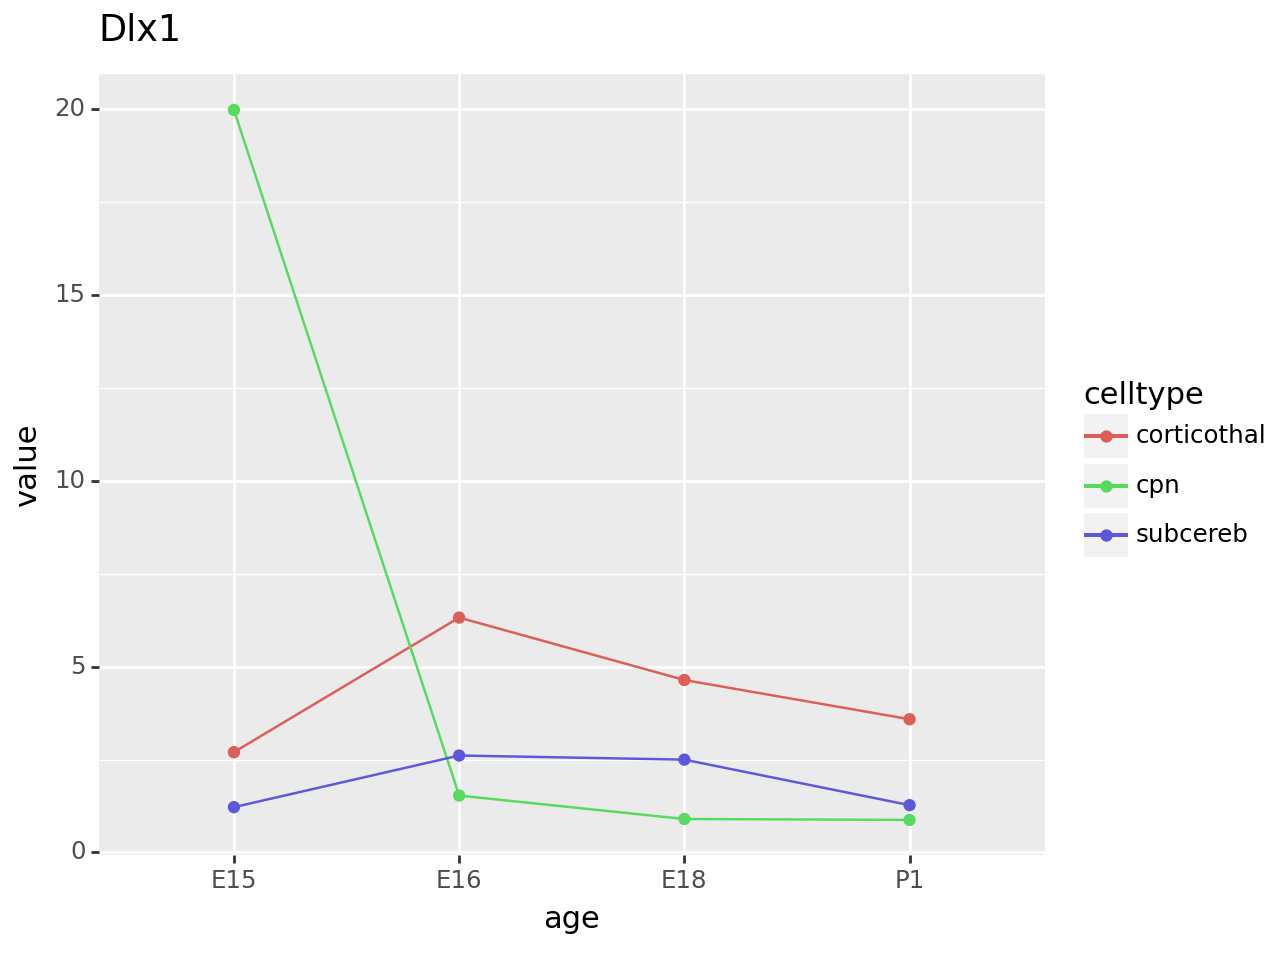

In [36]:
%matplotlib inline
# Create a reusable function to make a plot for a given gene
def plot_gene(gene_id):
	plot = (
		pn.ggplot(data_melted[data_melted['gene_id'] == gene_id], pn.aes(x='age', y='value', color='celltype'))
		+ pn.geom_point()
  		+ pn.geom_line(pn.aes(group='celltype'))
		+ pn.labs(title=gene_id)
	)
	return plot

p = plot_gene('Dlx1')

p.draw()

In [ ]:

gene_list = ['Cux1', 'Tle4', 'Bcl11b']

[plot_gene(gene).save(f'{gene}.pdf') for gene in gene_list]



### Heatmap Example


/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/loyalgoff/opt/anaconda3/envs/qmn2023/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


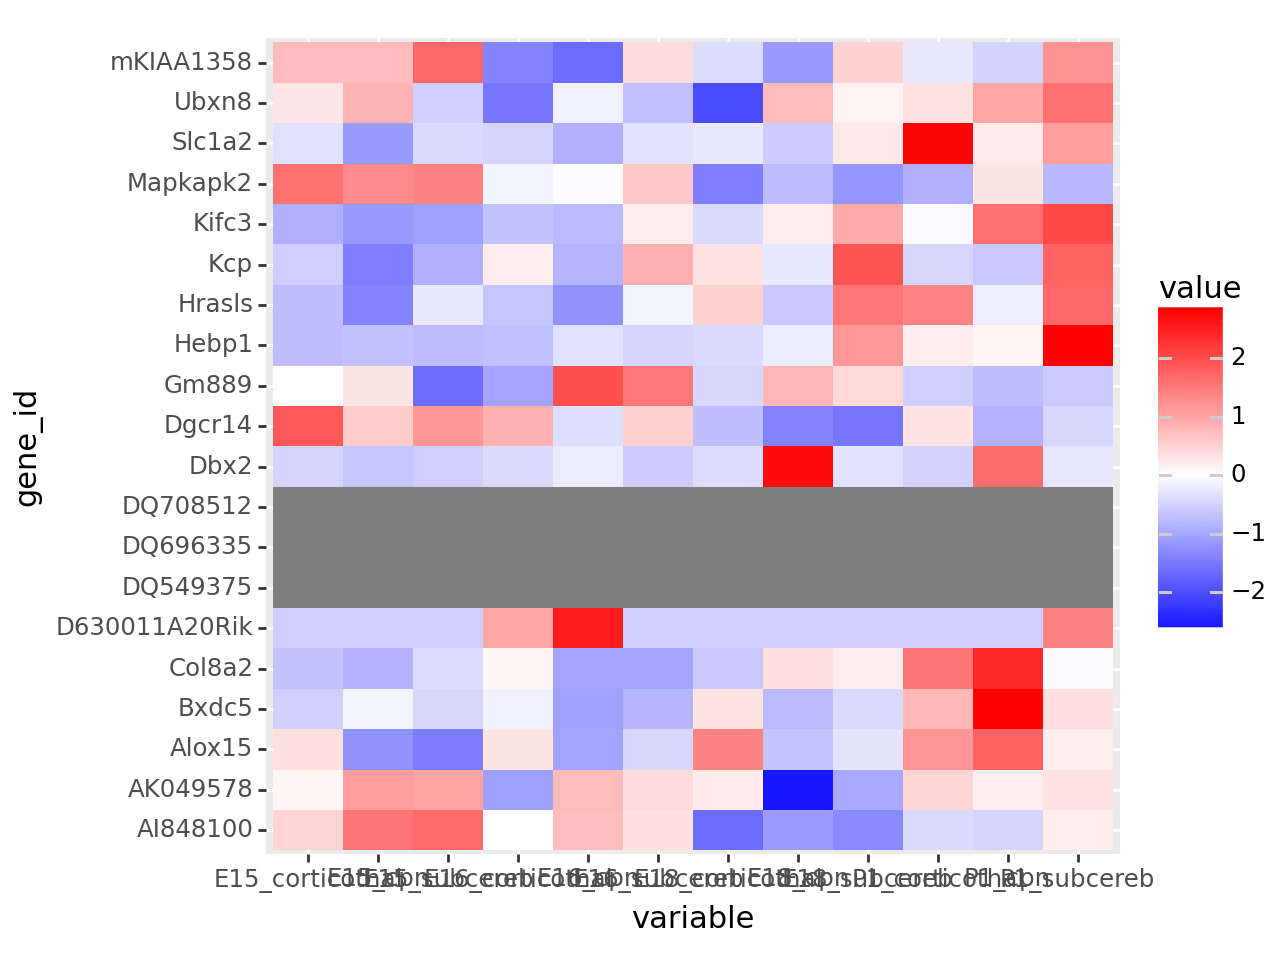

In [50]:
gene_list = data['gene_id'].sample(20).tolist()

plot_df = data_melted[data_melted['gene_id'].isin(gene_list)].copy()

# Row normalize the data
plot_df['value'] = plot_df.groupby('gene_id')['value'].transform(lambda x: (x - x.mean()) / x.std())

heatmap_plot = (
    pn.ggplot(plot_df, pn.aes(x='variable', y='gene_id', fill='value'))
    + pn.geom_tile()
    + pn.scale_fill_gradient2(low='blue', mid='white', high='red')
)

heatmap_plot.draw()